In [2]:
# !pip install yfinance

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [4]:
KEPCO = yf.download('015760.KS', start='2010-01-01', end='2024-04-12')

[*********************100%%**********************]  1 of 1 completed


In [5]:
KEPCO.to_excel('KEPCO.xlsx')

In [6]:
import pandas as pd
KEPCO = pd.read_excel('KEPCO.xlsx')

In [7]:
KEPCO.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,33800,34300,33800,34250,28362.451172,1919234
1,2010-01-05,34150,34200,33900,34050,28196.828125,2369123
2,2010-01-06,34000,34350,33900,34000,28155.423828,2460643
3,2010-01-07,33900,34000,33700,33800,27989.804688,1902855
4,2010-01-08,33700,34000,33500,33800,27989.804688,2637273


In [8]:
KEPCO.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3514,2024-04-04,21550,22100,21450,21750,21750.0,2141669
3515,2024-04-05,21500,21850,21400,21600,21600.0,962461
3516,2024-04-08,21700,22500,21450,22250,22250.0,2365677
3517,2024-04-09,22250,22500,22000,22150,22150.0,1491157
3518,2024-04-11,21900,22500,21150,21300,21300.0,3400061


<Axes: >

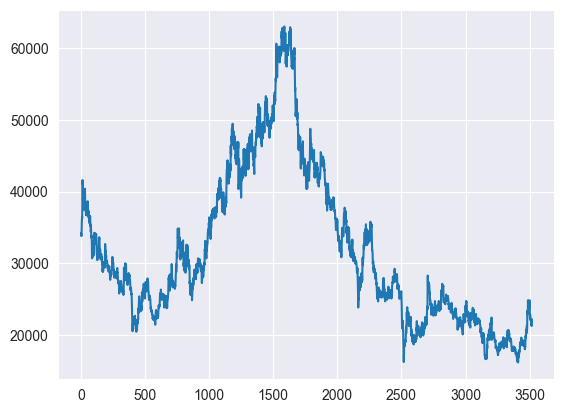

In [9]:
KEPCO['Close'].plot()

<Axes: >

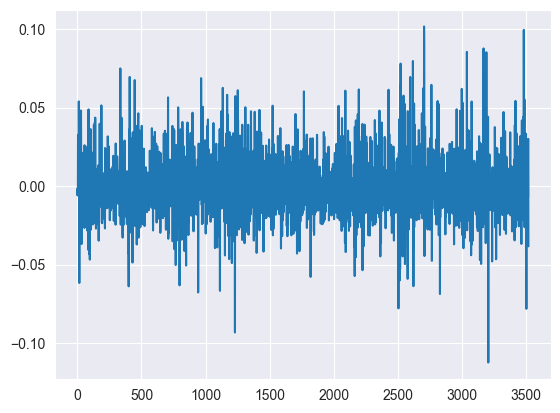

In [10]:
KEPCO['Close'].pct_change().plot()

<Axes: >

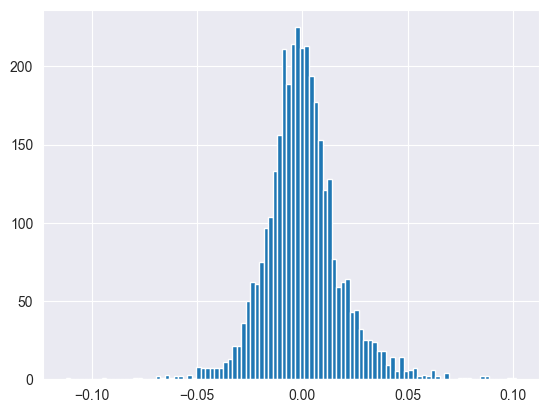

In [11]:
KEPCO['Close'].pct_change().hist(bins=100)

In [13]:
import numpy as np

<Axes: >

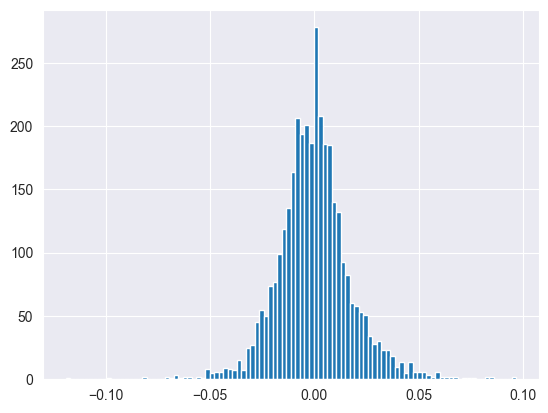

In [14]:
np.log(KEPCO['Close']).diff().hist(bins=100)

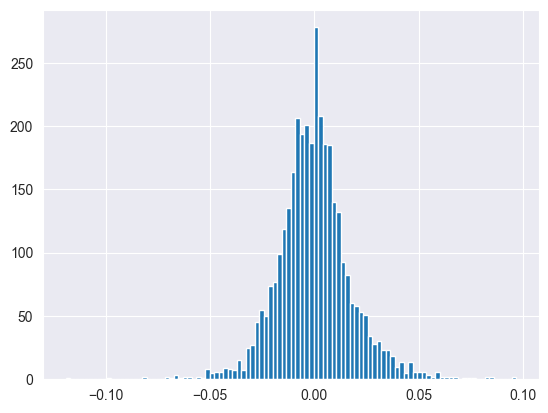

In [15]:
import matplotlib.pyplot as plt
plt.hist(np.log(KEPCO['Close']).diff().dropna(), bins=100)
plt.show()

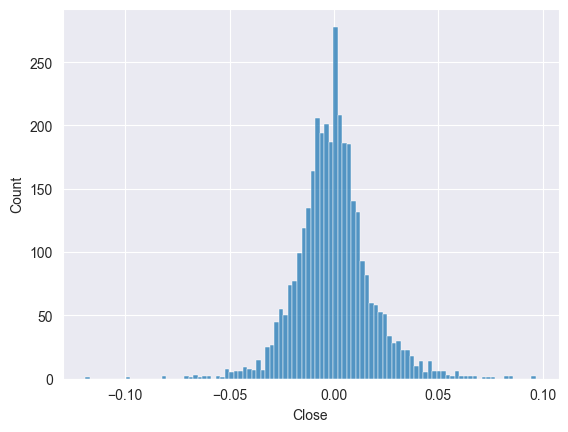

In [16]:
sns.histplot(np.log(KEPCO['Close']).diff().dropna(), bins=100)
plt.show()

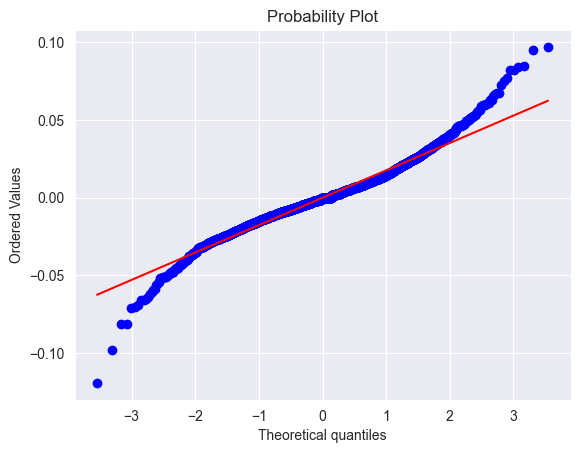

In [17]:
stats.probplot(np.log(KEPCO['Close']).diff().dropna(), dist="norm", plot=plt)
plt.show()

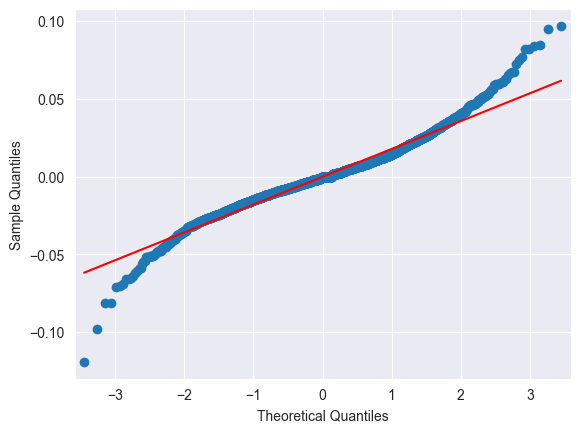

In [18]:
sm.qqplot(np.log(KEPCO['Close']).diff().dropna(), line='s')
plt.show()

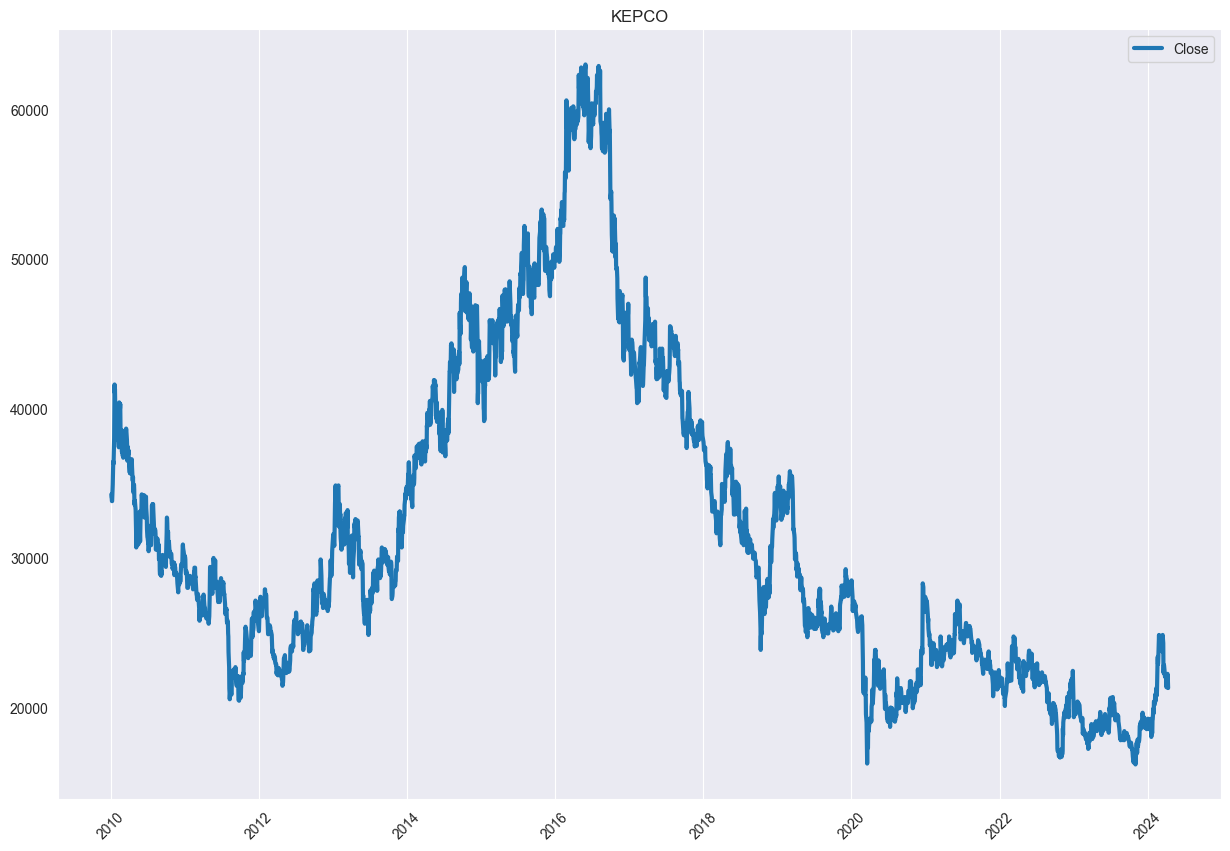

In [19]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=45)
plt.plot(KEPCO['Date'],KEPCO['Close'], label='Close', linewidth=3)
plt.legend()
plt.title('KEPCO')
plt.grid(axis='y')
plt.savefig('KEPCO.png', dpi=300)

In [20]:
KEPCO['Close_MA5']=KEPCO['Close'].rolling(window=5).mean()
KEPCO['Close_MA20']=KEPCO['Close'].rolling(window=20).mean()
KEPCO['Close_MA60']=KEPCO['Close'].rolling(window=60).mean()
KEPCO['Close_MA120']=KEPCO['Close'].rolling(window=120).mean()
KEPCO.to_excel('KEPCO_MA.xlsx')

In [21]:
KEPCO_MA = pd.read_excel('KEPCO_MA.xlsx')

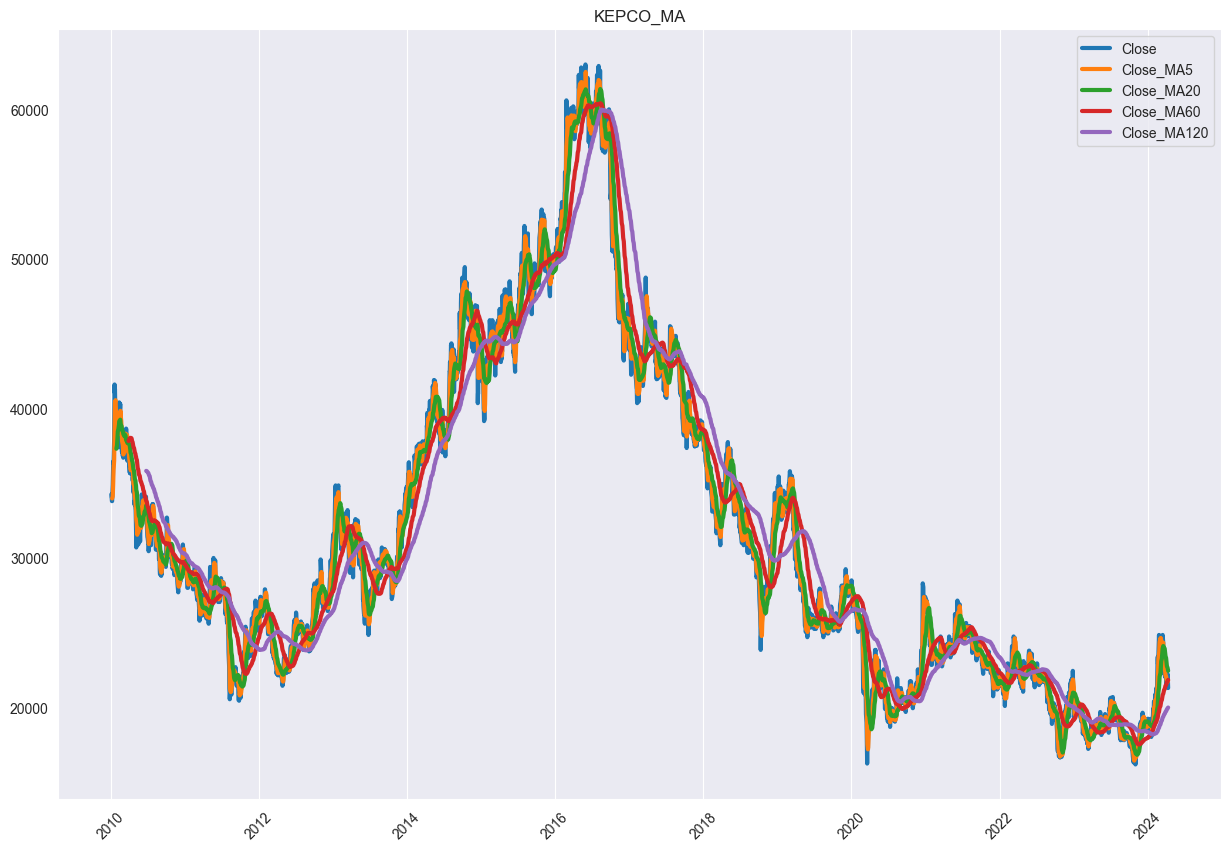

In [22]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=45)
plt.plot(KEPCO_MA['Date'],KEPCO_MA['Close'], label='Close', linewidth=3)
plt.plot(KEPCO_MA['Date'],KEPCO_MA['Close_MA5'], label='Close_MA5', linewidth=3)
plt.plot(KEPCO_MA['Date'],KEPCO_MA['Close_MA20'], label='Close_MA20', linewidth=3)
plt.plot(KEPCO_MA['Date'],KEPCO_MA['Close_MA60'], label='Close_MA60', linewidth=3)
plt.plot(KEPCO_MA['Date'],KEPCO_MA['Close_MA120'], label='Close_MA120', linewidth=3)
plt.legend()
plt.title('KEPCO_MA')
plt.grid(axis='y')
plt.savefig('KEPCO_MA.png', dpi=300)

In [23]:
KEPCO_MA['Close_MA5-20']=KEPCO_MA['Close_MA5']-KEPCO_MA['Close_MA20']
KEPCO_MA['Close_MA20-60']=KEPCO_MA['Close_MA20']-KEPCO_MA['Close_MA60']
KEPCO_MA['Close_MA60-120']=KEPCO_MA['Close_MA60']-KEPCO_MA['Close_MA120']
KEPCO_MA.to_excel('KEPCO_MA_diff.xlsx')

In [24]:
KEPCO_MA_diff = pd.read_excel('KEPCO_MA_diff.xlsx')

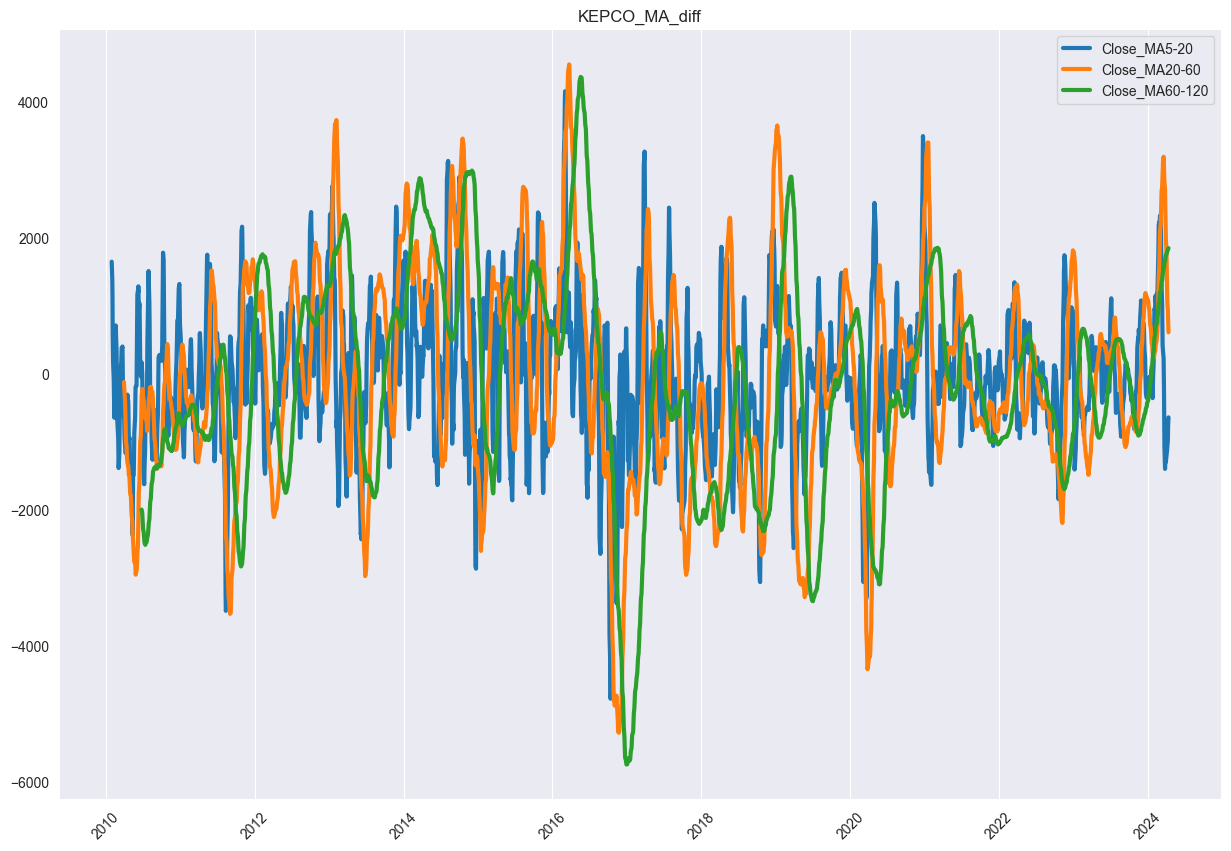

In [25]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=45)
plt.plot(KEPCO_MA_diff['Date'],KEPCO_MA_diff['Close_MA5-20'], label='Close_MA5-20', linewidth=3)
plt.plot(KEPCO_MA_diff['Date'],KEPCO_MA_diff['Close_MA20-60'], label='Close_MA20-60', linewidth=3)
plt.plot(KEPCO_MA_diff['Date'],KEPCO_MA_diff['Close_MA60-120'], label='Close_MA60-120', linewidth=3)
plt.legend()
plt.title('KEPCO_MA_diff')
plt.grid(axis='y')
plt.savefig('KEPCO_MA_diff.png', dpi=300)

<Axes: >

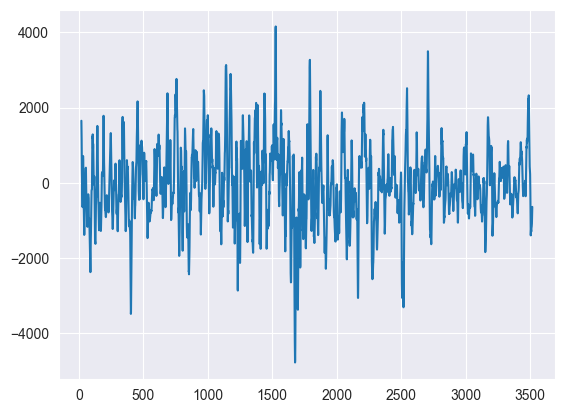

In [26]:
KEPCO_MA_diff['Close_MA5-20'].plot()

<Axes: >

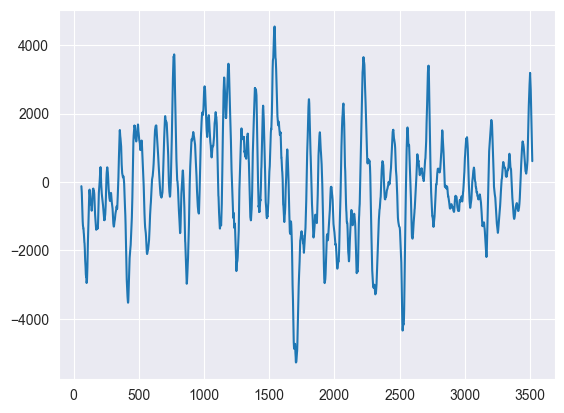

In [27]:
KEPCO_MA_diff['Close_MA20-60'].plot()

<Axes: >

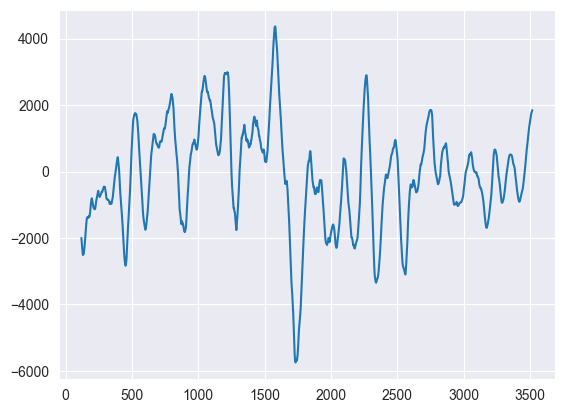

In [28]:
KEPCO_MA_diff['Close_MA60-120'].plot()

<Axes: >

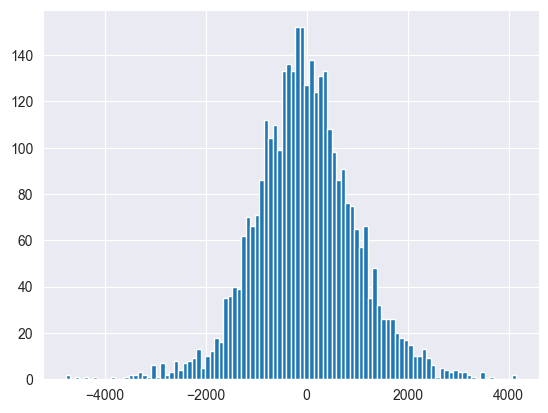

In [29]:
KEPCO_MA_diff['Close_MA5-20'].hist(bins=100)

<Axes: >

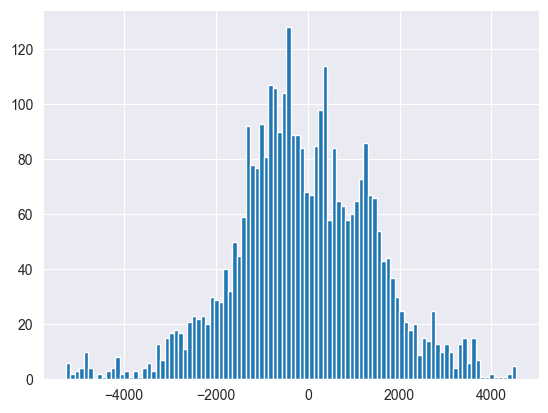

In [30]:
KEPCO_MA_diff['Close_MA20-60'].hist(bins=100)

<Axes: >

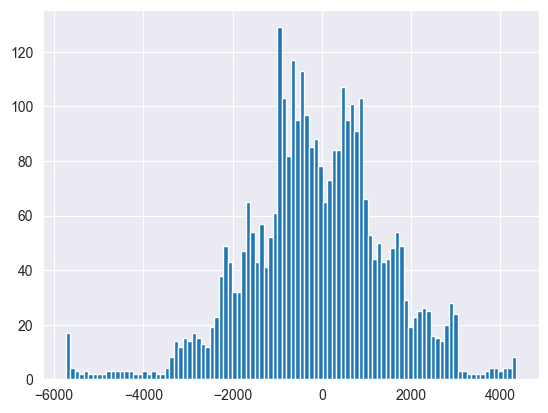

In [31]:
KEPCO_MA_diff['Close_MA60-120'].hist(bins=100)

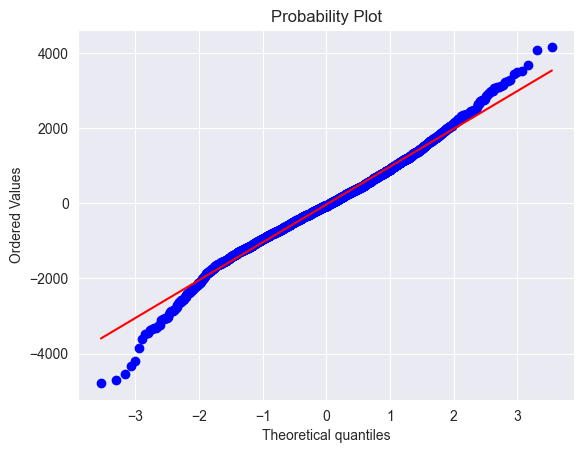

In [32]:
stats.probplot(KEPCO_MA_diff['Close_MA5-20'].dropna(), dist="norm", plot=plt)
plt.show()

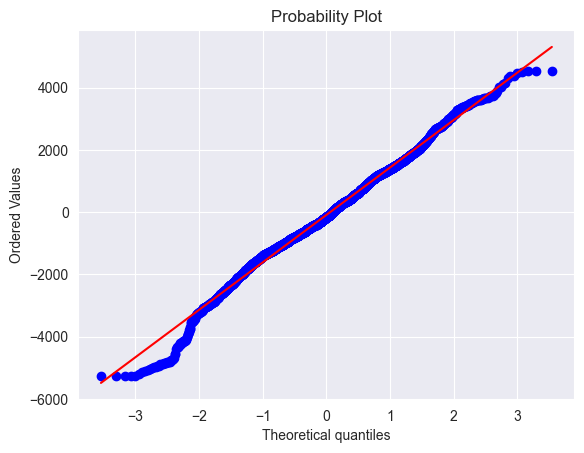

In [33]:
stats.probplot(KEPCO_MA_diff['Close_MA20-60'].dropna(), dist="norm", plot=plt)
plt.show()

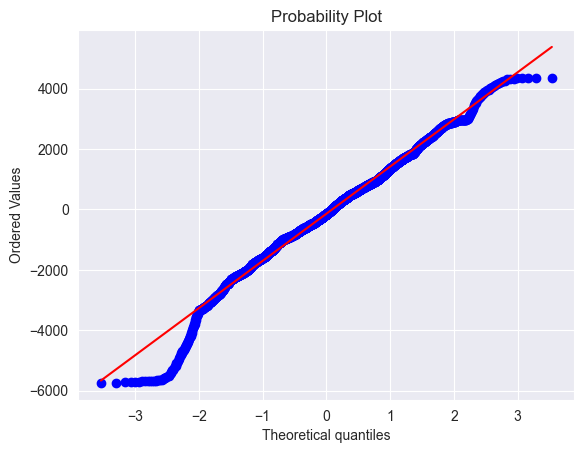

In [34]:
stats.probplot(KEPCO_MA_diff['Close_MA60-120'].dropna(), dist="norm", plot=plt)
plt.show()

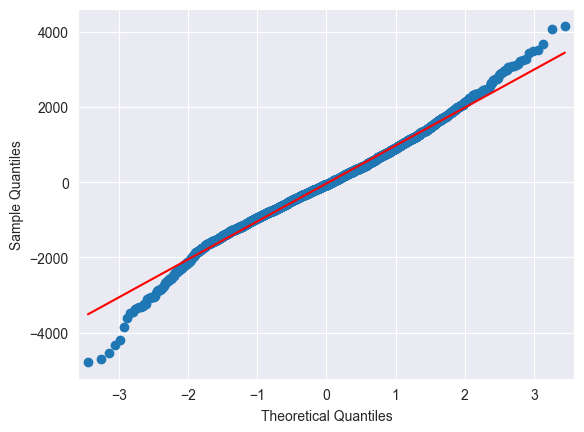

In [35]:
sm.qqplot(KEPCO_MA_diff['Close_MA5-20'].dropna(), line='s')
plt.show()

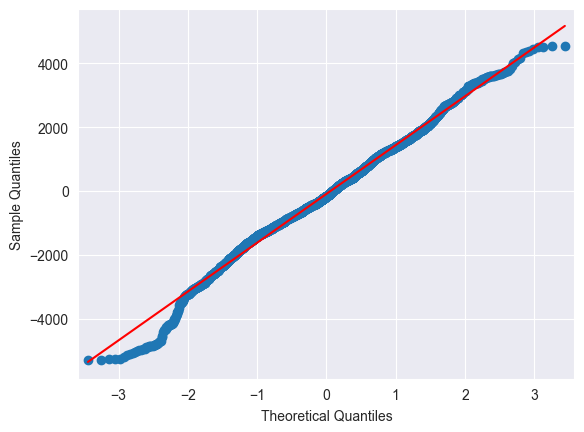

In [36]:
sm.qqplot(KEPCO_MA_diff['Close_MA20-60'].dropna(), line='s')
plt.show()

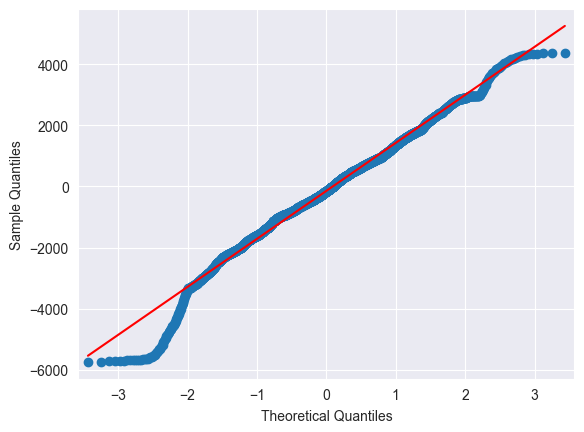

In [37]:
sm.qqplot(KEPCO_MA_diff['Close_MA60-120'].dropna(), line='s')
plt.show()

In [38]:
KEPCO_MA_diff['Close_MA5-20'].autocorr()

0.9777611063927018

In [39]:
KEPCO_MA_diff['Close_MA20-60'].autocorr()

0.9979986113706842

In [40]:
KEPCO_MA_diff['Close_MA60-120'].autocorr()

0.9995498846292294

In [41]:
KEPCO_MA_diff['Close_MA5-20'].autocorr(lag=5)

0.657026833553655

In [42]:
KEPCO_MA_diff['Close_MA20-60'].autocorr(lag=5)

0.9553615058687823

In [43]:
KEPCO_MA_diff['Close_MA60-120'].autocorr(lag=5)

0.9892851674693625

In [44]:
# !pip install pykrx

In [45]:
from pykrx import stock
df = stock.get_market_ohlcv_by_date("20100101", "20240412", "015760")
df.to_excel('KEPCO_krx.xlsx')

In [46]:
KEPCO_krx = pd.read_excel('KEPCO_krx.xlsx')

In [47]:
KEPCO_krx.head()

,날짜,시가,고가,저가,종가,거래량,등락률
0,2010-01-04,33800,34300,33800,34250,1924201,0.439883
1,2010-01-05,34150,34200,33900,34050,2372496,-0.583942
2,2010-01-06,34000,34350,33900,34000,2462029,-0.146843
3,2010-01-07,33900,34000,33700,33800,1903515,-0.588235
4,2010-01-08,33700,34000,33500,33800,2643550,0.000000


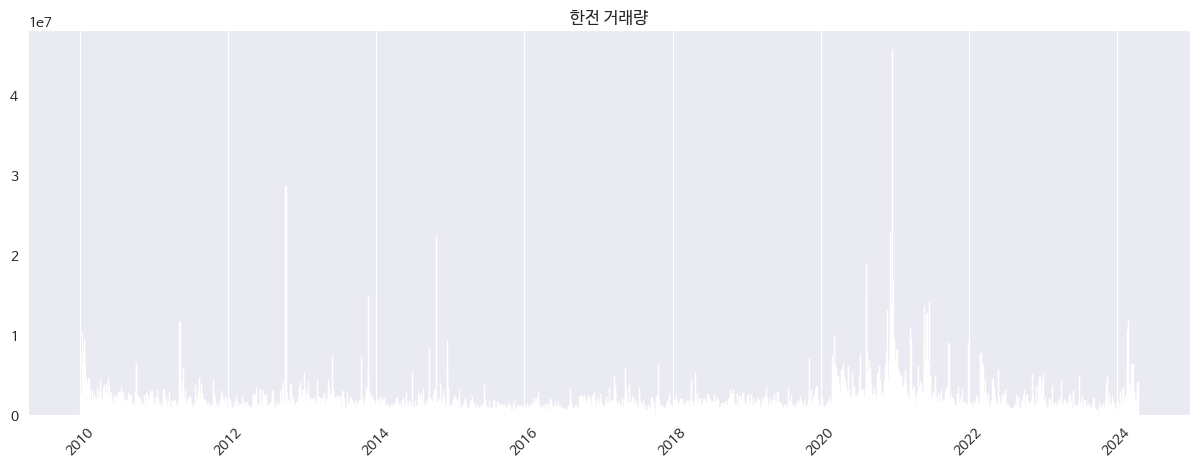

In [48]:
# 거래량 막대 그래프
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
plt.bar(KEPCO_krx['날짜'],KEPCO_krx['거래량'])
plt.title('한전 거래량')
plt.grid(axis='y')
plt.savefig('image/한전거래량.png',dpi=300)

In [50]:
df_1 = stock.get_market_fundamental("20100101", "20240412", "015760")
df_1.to_excel('data/KEPCO_f.xlsx')

In [51]:
df_1.head()

,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2010-01-04,66942,0.0,0.51,0,0.0,0
2010-01-05,66942,0.0,0.51,0,0.0,0
2010-01-06,66942,0.0,0.51,0,0.0,0
2010-01-07,66942,0.0,0.50,0,0.0,0
2010-01-08,66942,0.0,0.50,0,0.0,0


In [52]:
df_1.tail()

,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2024-04-05,63158,0.0,0.34,0,0.0,0
2024-04-08,63158,0.0,0.35,0,0.0,0
2024-04-09,63158,0.0,0.35,0,0.0,0
2024-04-11,63158,0.0,0.34,0,0.0,0
2024-04-12,63158,0.0,0.32,0,0.0,0
